### Load in the data

In [5]:
## Imports 
import pandas as pd
import matplotlib.pyplot as plt

#


In [7]:
file_path_raw = './data/compas-scores-raw.csv'
file_path_non_violent = './data/compas-scores-two-years.csv'
file_path_violent = './data/compas-scores-two-years.csv'

compas_data_raw = pd.read_csv(file_path_raw)
two_years_data = pd.read_csv(file_path_non_violent)
two_years_violent_data = pd.read_csv(file_path_violent)
compas_data_info = compas_data_raw.info()
compas_data_head = compas_data_raw.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60843 entries, 0 to 60842
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person_ID                60843 non-null  int64  
 1   AssessmentID             60843 non-null  int64  
 2   Case_ID                  60843 non-null  int64  
 3   Agency_Text              60843 non-null  object 
 4   LastName                 60843 non-null  object 
 5   FirstName                60843 non-null  object 
 6   MiddleName               15624 non-null  object 
 7   Sex_Code_Text            60843 non-null  object 
 8   Ethnic_Code_Text         60843 non-null  object 
 9   DateOfBirth              60843 non-null  object 
 10  ScaleSet_ID              60843 non-null  int64  
 11  ScaleSet                 60843 non-null  object 
 12  AssessmentReason         60843 non-null  object 
 13  Language                 60843 non-null  object 
 14  LegalStatus           

In [ ]:
def process_data(df):
    df['above_45'] = (df['age'] > 45).astype(int)
    df['below_25'] = (df['age'] < 25).astype(int)
    df['African_American'] = (df['race'] == 'African-American').astype(int)
    df['Asian'] = (df['race'] == 'Asian').astype(int)
    df['Hispanic'] = (df['race'] == 'Hispanic').astype(int)
    df['Native_American'] = (df['race'] == 'Native American').astype(int)
    df['Other'] = (df['race'] == 'Other').astype(int)
    df['Female'] = (df['sex'] == 'Female').astype(int)
    df['misdemeanor'] = (df['c_charge_degree'] == 'M').astype(int)

    return df

# processing
two_years_data = process_data(two_years_data)
two_years_violent_data = process_data(two_years_violent_data)

# columns of interest
columns_of_interest = [
    'priors_count', 'above_45', 'below_25', 'African_American', 'Asian',
    'Hispanic', 'Native_American', 'Other', 'Female', 'misdemeanor',
    'v_decile_score', 'age', 'juv_fel_count', 'two_year_recid', 'is_recid'
]

combined_data = two_years_data[columns_of_interest].copy()

additional_features = [
    'juv_misd_count', 'juv_other_count', 'days_b_screening_arrest', 
    'c_charge_desc', 'screening_date', 'decile_score', 'score_text'
]
additional_features = [col for col in additional_features if col in two_years_data.columns]

combined_data = pd.concat([combined_data, two_years_data[additional_features]], axis=1)

output_path = './data/compas_combined_dataset.csv'
combined_data.to_csv(output_path, index=False)


In [10]:
# Data Cleaning
compas_data_raw['DateOfBirth'] = pd.to_datetime(compas_data_raw['DateOfBirth'], errors='coerce')
compas_data_raw['Screening_Date'] = pd.to_datetime(compas_data_raw['Screening_Date'], errors='coerce')
drop = ['Person_ID', 'AssessmentID', 'Case_ID', 'LastName', 'FirstName', 'MiddleName', 
                   'ScaleSet_ID', 'Scale_ID']
compas_data_cleaned = compas_data_raw.drop(columns=drop)
compas_data_info_cleaned = compas_data_cleaned.info()
compas_data_head_cleaned = compas_data_cleaned.head()




/var/folders/jh/g1jlvxkd1nv5yvt4q5pmbzn00000gn/T/ipykernel_49489/3882739481.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  compas_data_raw['DateOfBirth'] = pd.to_datetime(compas_data_raw['DateOfBirth'], errors='coerce')
/var/folders/jh/g1jlvxkd1nv5yvt4q5pmbzn00000gn/T/ipykernel_49489/3882739481.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  compas_data_raw['Screening_Date'] = pd.to_datetime(compas_data_raw['Screening_Date'], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60843 entries, 0 to 60842
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Agency_Text              60843 non-null  object        
 1   Sex_Code_Text            60843 non-null  object        
 2   Ethnic_Code_Text         60843 non-null  object        
 3   DateOfBirth              60843 non-null  datetime64[ns]
 4   ScaleSet                 60843 non-null  object        
 5   AssessmentReason         60843 non-null  object        
 6   Language                 60843 non-null  object        
 7   LegalStatus              60843 non-null  object        
 8   CustodyStatus            60843 non-null  object        
 9   MaritalStatus            60843 non-null  object        
 10  Screening_Date           60843 non-null  datetime64[ns]
 11  RecSupervisionLevel      60843 non-null  int64         
 12  RecSupervisionLevelText  60843 n

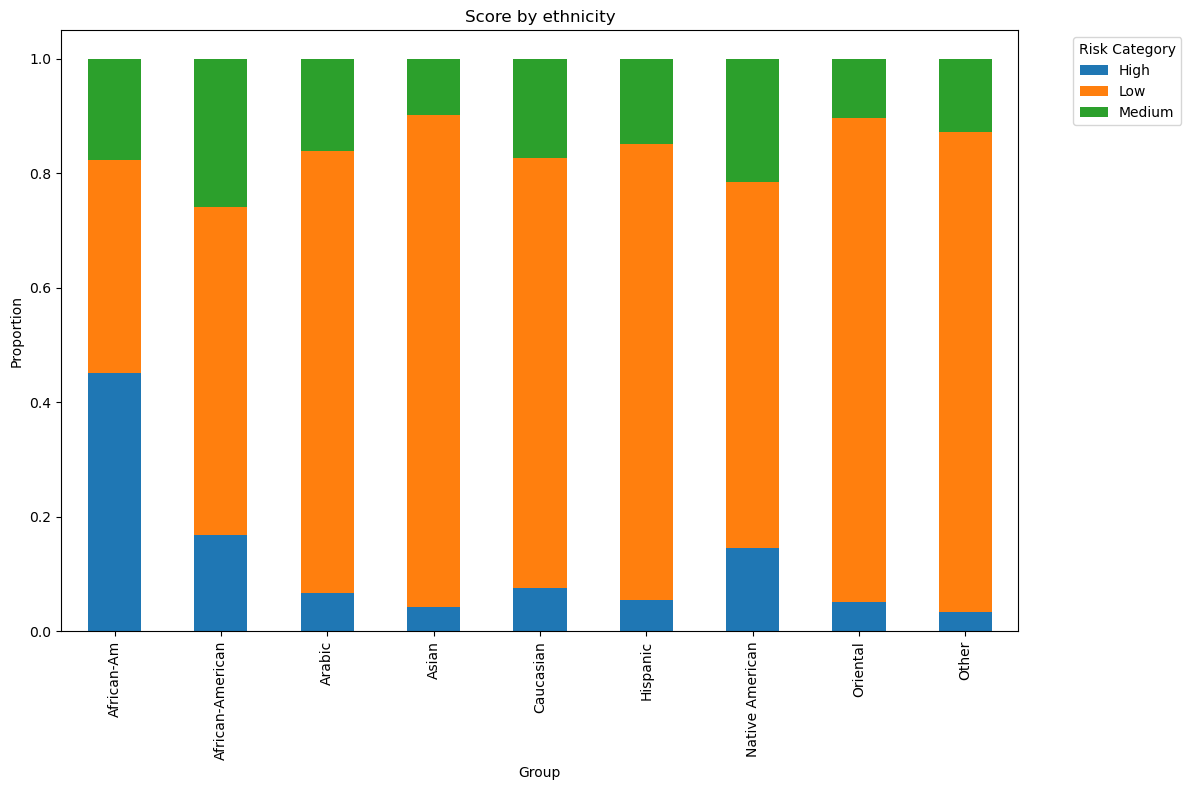

In [11]:
chart_data = compas_data_cleaned.groupby('Ethnic_Code_Text')['ScoreText'].value_counts(normalize=True).unstack()

chart_data.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Score by ethnicity')
plt.xlabel('Group')
plt.ylabel('Proportion')
plt.legend(title='Risk Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

